# Simple linear regression - exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data.

In this exercise, the dependent variable is 'price', while the independent variables is 'size'.

Good luck!

## Import the relevant libraries

In [12]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


## Load the data

In [6]:
data = pd.read_csv('real_estate_price_size.csv')

In [9]:
data.head()


,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [10]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


## Create the regression

### Declare the dependent and the independent variables

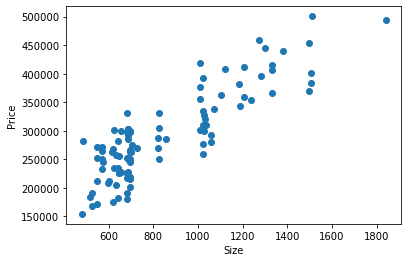

In [13]:
y = data['price']
x1 = data['size']

plt.figure()
plt.xlabel('Size', fontweight=20)
plt.ylabel('Price', fontweight=20)
plt.scatter(x1, y)
plt.show();

### Explore the data

In [18]:
x = sm.add_constant(x1)

print(x.head())
print(x1.head())

   const     size
0    1.0   643.09
1    1.0   656.22
2    1.0   487.29
3    1.0  1504.75
4    1.0  1275.46
0     643.09
1     656.22
2     487.29
3    1504.75
4    1275.46
Name: size, dtype: float64


### Regression itself

In [19]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
print(type(results))
results.summary()

<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Sun, 30 May 2021   Prob (F-statistic):           8.13e-31
Time:                        22:35:30   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plot the regression line on the initial scatter

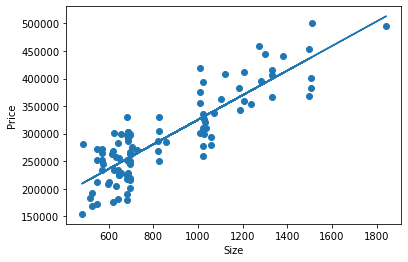

In [22]:
yhat = 101900 + 223.1787 * x1
plt.figure()

plt.xlabel('Size')
plt.ylabel('Price')
plt.scatter(x1, y)

plt.plot(x1, yhat)